In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Battle Ship

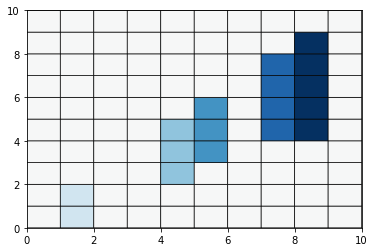

In [2]:

def Ship_spot(board_size,
              de_l, de_c, de_o,  #destroyer2
              cr_l, cr_c, cr_o,  #cruiser3
              su_l, su_c, su_o,  #submarine3
              ba_l, ba_c, ba_o,  #battleship4
              ca_l, ca_c, ca_o): #carrier5
    my_board = np.zeros((board_size,board_size))
    data1 = np.array([[de_l, de_c, 2, 2], [cr_l, cr_c, 3,3],[su_l, su_c, 3,3],[ba_l, ba_c, 4,4],[ ca_l, ca_c, 5,5]])
    data2 = de_o, cr_o, su_o, ba_o, ca_o
    for i, j in enumerate(data1):
        if data2[i] == 'down':
            my_board[j[0]:j[0]+j[2]   ,   j[1]] = i+1
        
        if data2[i] == 'left':
            my_board[j[0]   ,  abs(j[1]-j[2]+1):j[1]+1] = i+1
        
        if data2[i] == 'up':
            my_board[abs(j[0]-j[2]+1):j[0]+1   ,  j[1]] = i+1
        
        if data2[i] == 'right':
            my_board[j[0]   ,  j[1]:j[1]+j[2]] = i+1

    return my_board
M = Ship_spot(10,1,1,'up',4,4,'up',5,5,'up',7,7,'up',8,8,'up')
plt.pcolor(M , edgecolors='k', cmap="RdBu", vmin=-5,vmax=5, linewidths=0.7)
plt.show()

In [3]:
class player():
    def __init__(self, name, board_size, de_l, de_c, de_o, cr_l, cr_c, cr_o, su_l,
                                              su_c, su_o, ba_l, ba_c, ba_o,ca_l, ca_c, ca_o):
        self.player = name
        self.board_size = board_size
        self.Heris_board_shotted = np.zeros((board_size,board_size))
        self.my_board = Ship_spot(board_size, de_l, de_c, de_o, cr_l, cr_c, cr_o, su_l,
                                              su_c, su_o, ba_l, ba_c, ba_o,ca_l, ca_c, ca_o)

    def My_board(self,shot_x=None,shot_y=None):#show my player's ships
        return self.my_board
    
    def Heris_board(self,shot_x=None,shot_y=None): #show heris player's shotted
        return self.Heris_board_shotted
        
    def __str__(self):
        return 'Player: {}; Size of the board: {} by {}'.format(self.player
                ,len(self.my_board),len(self.my_board))

Amary pick x for the shot: 0
Amary pick y for the shot: 0
Round:  1 . That was close


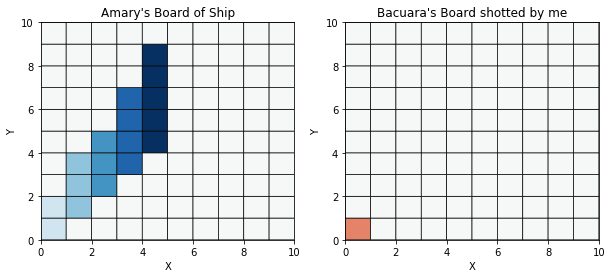

Bacuara pick x for the shot: 0
Bacuara pick y for the shot: 0
Round:  1 . You got one


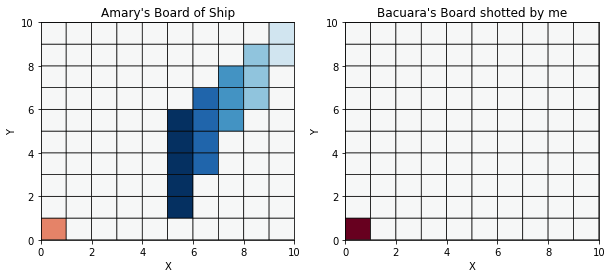

Amary pick x for the shot: 1
Amary pick y for the shot: 0
Round:  2 . That was close


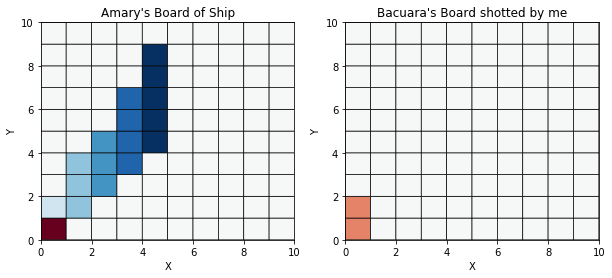

Bacuara pick x for the shot: 1
Bacuara pick y for the shot: 0
Round:  2 . You got one


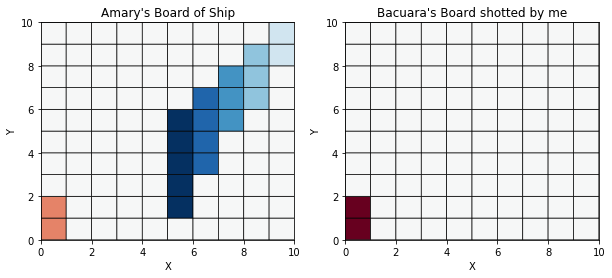

Amary pick x for the shot: 1
Amary pick y for the shot: 1
Round:  3 . That was close


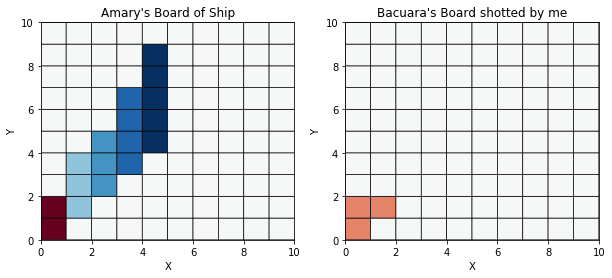

Bacuara pick x for the shot: 1
Bacuara pick y for the shot: 1
Round:  3 . You got one


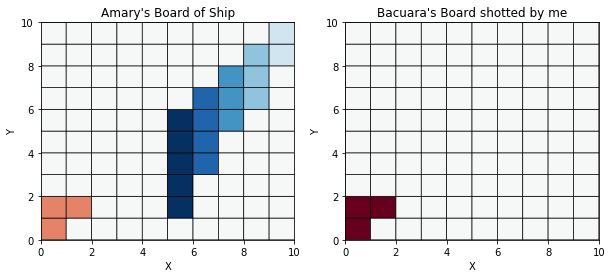

Amary pick x for the shot: 2
Amary pick y for the shot: 1
Round:  4 . That was close


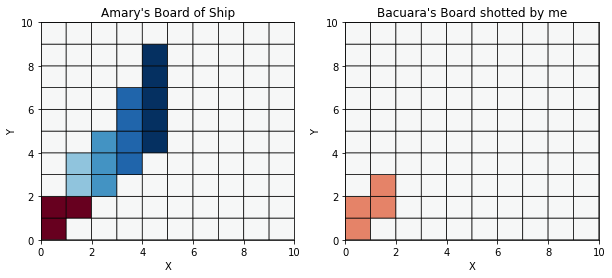

Bacuara pick x for the shot: 2
Bacuara pick y for the shot: 1
Round:  4 . You got one


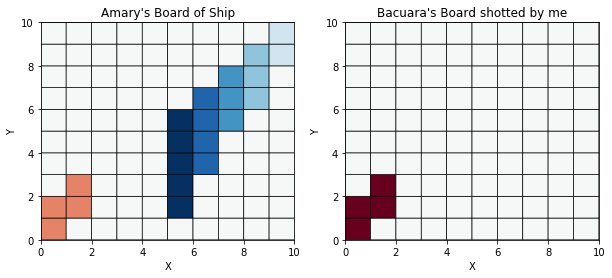

Amary pick x for the shot: 3
Amary pick y for the shot: 1
Round:  5 . That was close


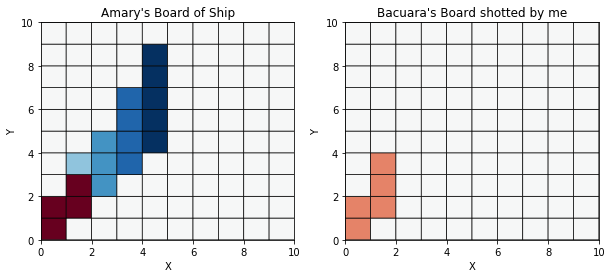

Bacuara pick x for the shot: 3
Bacuara pick y for the shot: 1
Round:  5 . You got one


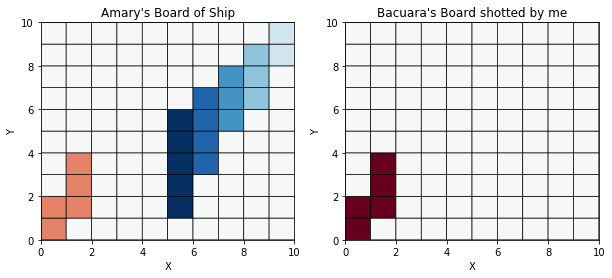

Amary pick x for the shot: 2
Amary pick y for the shot: 2
Round:  6 . That was close


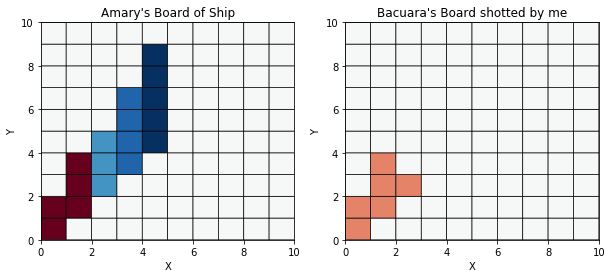

Bacuara pick x for the shot: 2
Bacuara pick y for the shot: 2
Round:  6 . You got one


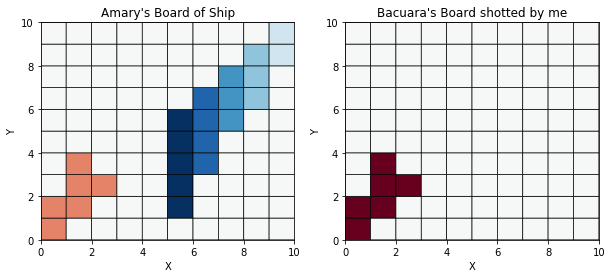

Amary pick x for the shot: 3
Amary pick y for the shot: 2
Round:  7 . That was close


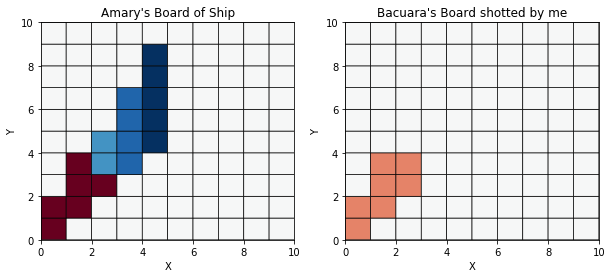

Bacuara pick x for the shot: 3
Bacuara pick y for the shot: 2
Round:  7 . You got one


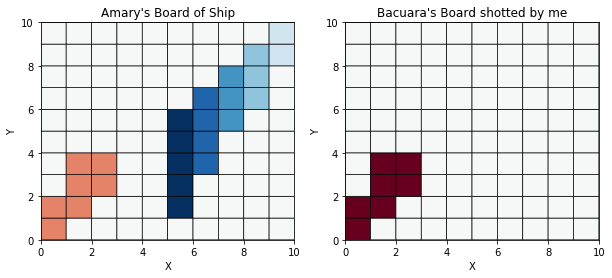

Amary pick x for the shot: 4
Amary pick y for the shot: 2
Round:  8 . That was close


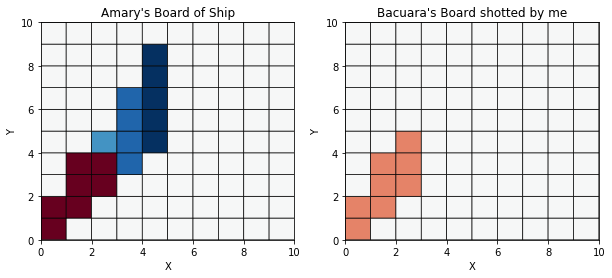

Bacuara pick x for the shot: 4
Bacuara pick y for the shot: 2
Round:  8 . You got one


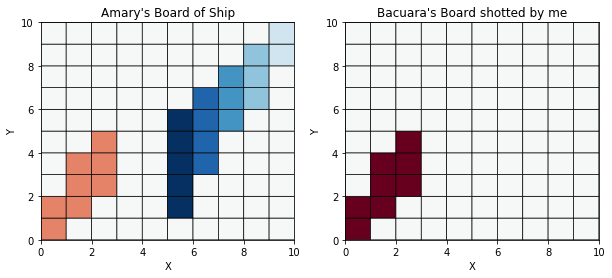

Amary pick x for the shot: 3
Amary pick y for the shot: 3
Round:  9 . That was close


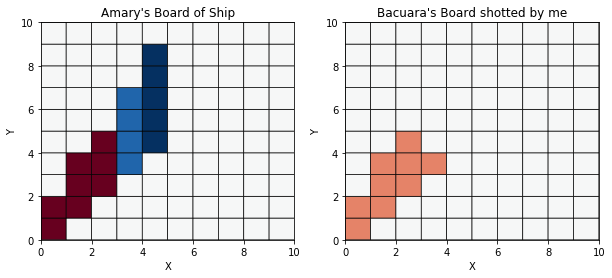

Bacuara pick x for the shot: 3
Bacuara pick y for the shot: 3
Round:  9 . You got one


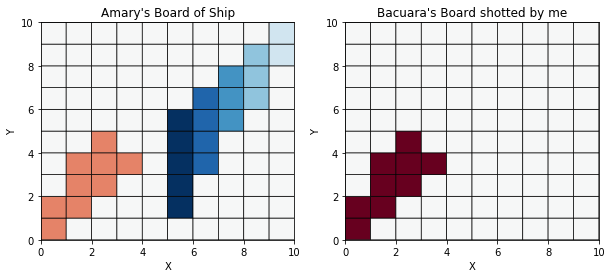

Amary pick x for the shot: 4
Amary pick y for the shot: 3
Round:  10 . That was close


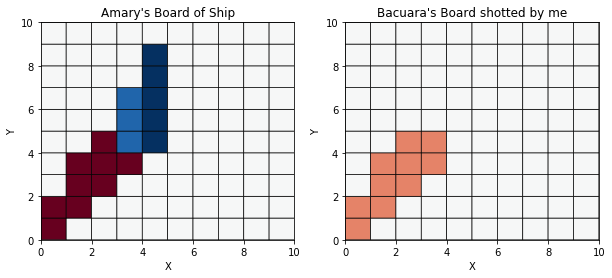

Bacuara pick x for the shot: 4
Bacuara pick y for the shot: 3
Round:  10 . You got one


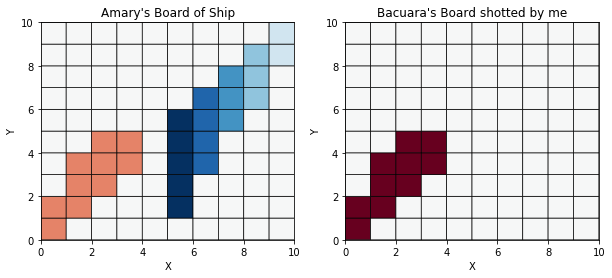

Amary pick x for the shot: 5
Amary pick y for the shot: 3
Round:  11 . That was close


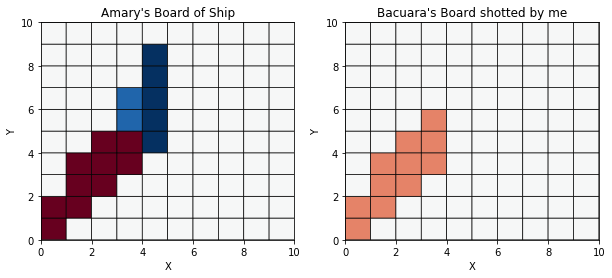

Bacuara pick x for the shot: 5
Bacuara pick y for the shot: 3
Round:  11 . You got one


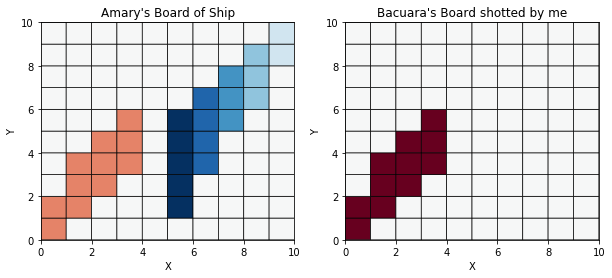

Amary pick x for the shot: 6
Amary pick y for the shot: 3
Round:  12 . That was close


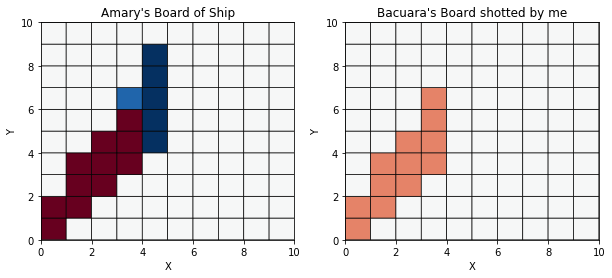

Bacuara pick x for the shot: 6
Bacuara pick y for the shot: 3
Round:  12 . You got one


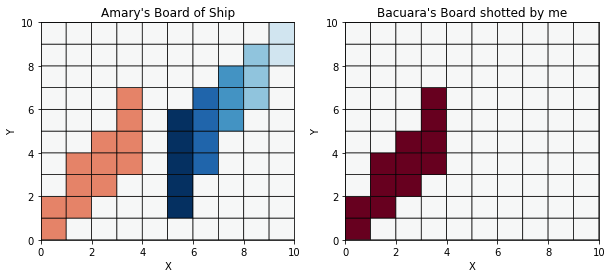

Amary pick x for the shot: 4
Amary pick y for the shot: 4
Round:  13 . That was close


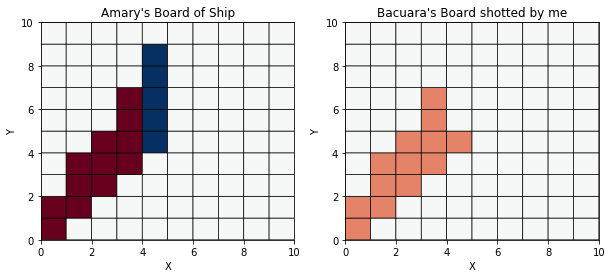

Bacuara pick x for the shot: 4
Bacuara pick y for the shot: 4
Round:  13 . You got one


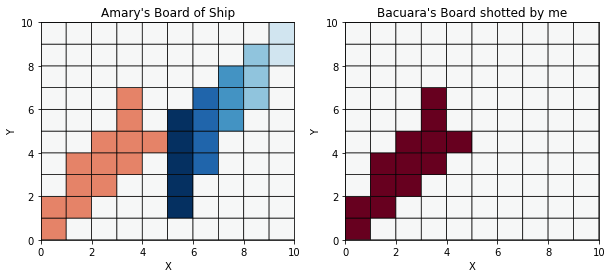

Amary pick x for the shot: 5
Amary pick y for the shot: 4
Round:  14 . That was close


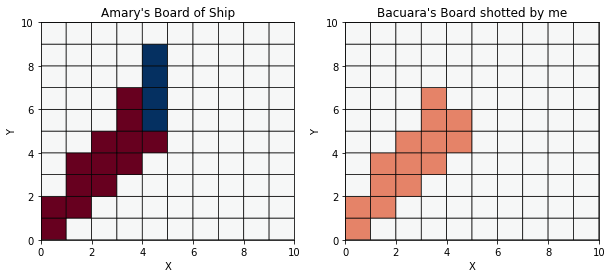

Bacuara pick x for the shot: 5
Bacuara pick y for the shot: 4
Round:  14 . You got one


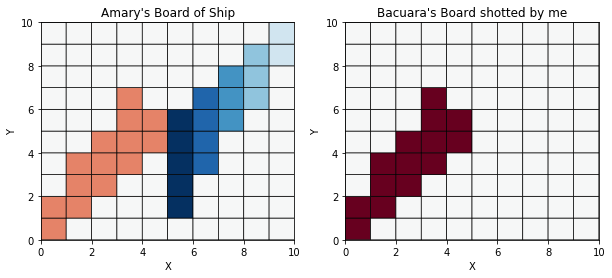

Amary pick x for the shot: 6
Amary pick y for the shot: 4
Round:  15 . That was close


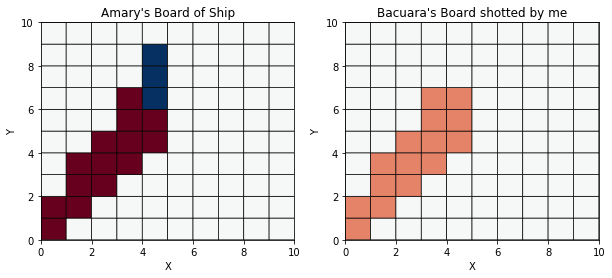

Bacuara pick x for the shot: 6
Bacuara pick y for the shot: 4
Round:  15 . You got one


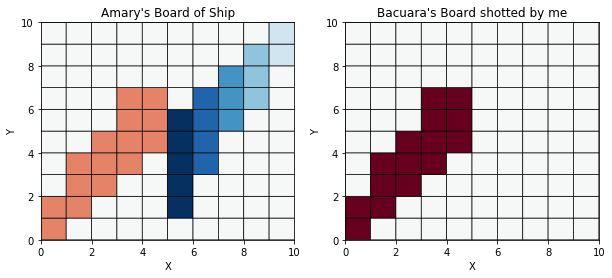

Amary pick x for the shot: 7
Amary pick y for the shot: 4
Round:  16 . That was close


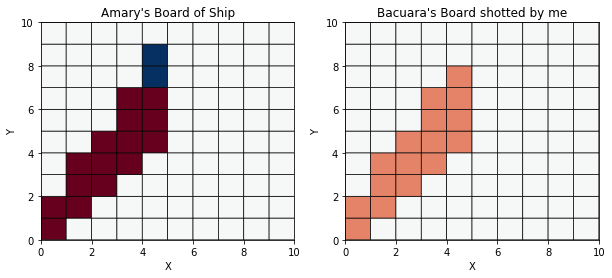

Bacuara pick x for the shot: 7
Bacuara pick y for the shot: 4
Round:  16 . You got one


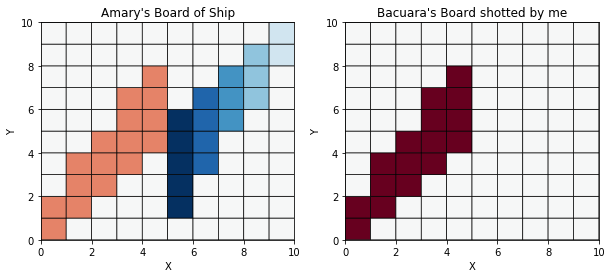

Amary pick x for the shot: 8
Amary pick y for the shot: 4
Round:  17 . That was close


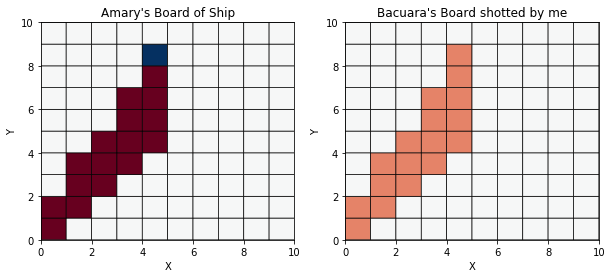

Bacuara pick x for the shot: 8
Bacuara pick y for the shot: 4
Round:  17 . You got one


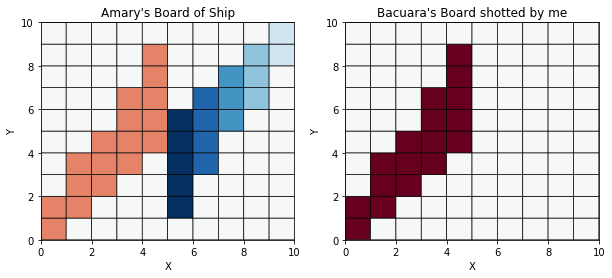

'Amary won the game'

In [19]:
class main:
    def __init__(self):
        self.p1 = player('Amary'  ,10,0,0,'down',1,1,'down',2,2,'down',3,3,'down',4,4,'down')
        self.p2 = player('Bacuara',10,9,9,'up',8,8,'up',7,7,'up',6,6,'up',5,5,'up')
        

    def plot(self , My_board , Heris_board):
        f = plt.figure(figsize=(10,4))
        ax1,ax2 = f.add_subplot(121),f.add_subplot(122)
        ax1.pcolor(My_board   ,edgecolors='k', cmap="RdBu", vmin=-5,vmax=5, linewidths=0.7)
        ax2.pcolor(Heris_board,edgecolors='k', cmap="RdBu", vmin=-5,vmax=5, linewidths=0.7)
        ax1.set_xlabel('X'),ax1.set_ylabel('Y')
        ax2.set_xlabel('X'),ax2.set_ylabel('Y')
        ax1.set_title(self.p1.player+"'s Board of Ship")
        ax2.set_title(self.p2.player+"'s Board shotted by me")
        plt.show()
        return

    def play(self):
        count1, count2, times = 0, 0,1
        while count1  < 17 and count2 < 17:
            x,y = int(input(self.p1.player+' pick x for the shot: ')), int(input(self.p1.player+' pick y for the shot: '))
            if self.p2.My_board()[x,y] == 0:
                self.p2.My_board()[x,y] = -2.5
                self.p1.Heris_board()[x,y] = -2.5
                print('Round: ',times,'. That was close')
            elif self.p2.My_board()[x,y] > 0 :
                self.p2.My_board()[x,y] = -10
                self.p1.Heris_board()[x,y] = -10
                print('Round: ',times,'. You got one')
                count1 += 1
            self.plot( self.p1.My_board() , self.p1.Heris_board() )
  
            x,y = int(input(self.p2.player+' pick x for the shot: ')), int(input(self.p2.player+' pick y for the shot: '))
            if self.p1.My_board()[x,y] == 0: 
                self.p1.My_board()[x,y] = -2.5
                self.p2.Heris_board()[x,y] = -2.5
                print('Round: ',times,'. That was close')
            elif self.p1.My_board()[x,y] > 0 :
                self.p1.My_board()[x,y] = -10
                self.p2.Heris_board()[x,y] = -10
                print('Round: ',times,'. You got one')
                count2 += 1
            self.plot( self.p2.My_board() , self.p2.Heris_board() )

            times +=1
        
        if count1 > count2:
            win = self.p1.player+' won the game'
        else: win = self.p1.player+' won the game'
        return win
    
main().play()